<a href="https://colab.research.google.com/github/rsgirishkumar/SM5083/blob/main/ASSIGNMENT2/codes/BOP_ASS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0. 0.]
[2.82842712 2.82842712]
After Affine: [2.82842712 2.82842712]
[2.82842712 2.82842712]
[-2.82842712  2.82842712]
[2.82842712 0.        ] [0.         2.82842712]
[2. 2.]
[2. 2.]
[-2.  2.]
B; [2. 1.]
-2.0x+2.0y+2.0=0
-2.0x+-2.0y+6.0=0
2.0x+-2.0y+6.0=0
2.0x+2.0y+2.0=0


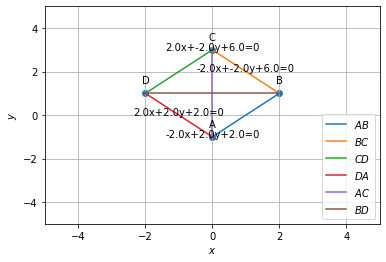

In [17]:

#Question: The opposite vertices of a sqaure are (0,-1), (0,3). Find the equations of four sides.
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy.linalg import norm


# Generate line points
def line_gen(A, B):
    len = 10
    dim = A.shape[0]
    x_AB = np.zeros((dim, len))
    lam_1 = np.linspace(0, 1, len)
    for i in range(len):
        temp1 = A + lam_1[i] * (B - A)
        x_AB[:, i] = temp1.T
    return x_AB

#orthogonal matrix
omat = np.array([[0,1],[-1,0]])
#TRANSLATION
#Shifting co-ordinates by [0,1]
def translation(a, trnslt_mat):
    a_trans = a-trnslt_mat
    return a_trans

#ROTATION
def rotation(a, rot_angle):
#rotation angle
    #rot_angle = math.pi/4
#print(rot_angle)
    cos_rot_angle = math.cos(rot_angle)
    sin_rot_angle = math.sin(rot_angle)
    #print(cos_rot_angle, sin_rot_angle)
#rotation matrix is given by [[cos(angle), -sin(angle)],[sin(angle),cos(angle)]]
    rot_mat = np.array(([cos_rot_angle, -sin_rot_angle],[sin_rot_angle,cos_rot_angle]))
    #print(rot_mat)
#rotating given coordinates
    a_rot_prime = a @ rot_mat
    print(a_rot_prime)
    return a_rot_prime

#DEFINITION OF FUNCTION FOR COEFFICIENTS OF EQUATION GENERATION
def coeff_gen(A,B,AB):
    #print(A,B,AB)
    A_prime = np.array([-A[1],A[0]])
    #print(A_prime)
    coeff_a = -round(AB[1],2)
    coeff_b = round(AB[0],2)
    AB_prime = np.array([AB])
    #print(A_prime,np.transpose(AB_prime))
    coeff_c = np.matmul(A_prime, np.transpose(AB_prime))
    #print(coeff_c)
    coeff_mat = np.array([coeff_a, coeff_b, round(coeff_c[0])])
    return coeff_mat

#x_AC = line_gen(a,c)
#print(x_AC)
# GIVEN POINTS
a = np.array([0,-1])
c = np.array([0,3])
trnslt_mat = np.array([0,-1])
a_prime = translation(a,trnslt_mat)
c_prime = translation(c,trnslt_mat)
rot_angle = (math.pi)/4
a_prime_rot = rotation(a_prime, rot_angle)
c_prime_rot = rotation(c_prime, rot_angle)
print("After Affine:",c_prime_rot)
#Direction Vector
x_AC = c_prime_rot - a_prime_rot
print(x_AC)
#Perpendicular Vector
x_BD = x_AC @ omat
print(x_BD)
#The vector which is orthogonal to x_ac is another diagonal and that vector is given by the transpose of vector array. Hence
#x_bd = np.vstack(x_ac)
# MIDPOINT OF DIAGONAL
#mp = np.array([(a_prime_rot[0]+c_prime_rot[0])/2,(a_prime_rot[1]+c_prime_rot[1])/2])
#print(mp)
#Other unknown coordinates
dist_ac = norm(c-a)
len_bd = norm(x_BD)
#print(len_bd)
#LET MIDPOINT BE vector MP  and denoted by M
#SINCE vector AC is a diagonal, AC= AM+MC. SIMILARLY BD= BM+MD
b_prime_rot=np.array([a_prime_rot[0]+(dist_ac/math.sqrt(2)),a_prime_rot[1]])
d_prime_rot=np.array([a_prime_rot[0], a_prime_rot[1]+(dist_ac/math.sqrt(2))])
print(b_prime_rot,d_prime_rot)
#REVERSE AFFINE TRANSFORMATION
#ANTI CLOCK WISE ROTATION
rot_angle = -(math.pi/4)
b_prime = rotation(b_prime_rot, rot_angle)
print(b_prime)
d_prime = rotation(d_prime_rot, rot_angle)
#REVERSE TRANSLATION
trnslt_mat = np.array([0,1])
b=translation(b_prime,trnslt_mat)
print("B;",b)
d=translation(d_prime,trnslt_mat)
# Direction Vectors
x_AB = b-a
x_BC = c-b
x_CD = d-c
x_DA = a-d

#print(x_AB, x_BC, x_CD, x_DA)

# EQUATIONS OF A LINE GENERATION
'''
WHEN TWO COORDINATES (X1 Y1) AND (X2 Y2) ARE GIVEN, THEN THE LINE EQUATION IS GIVEN BY 
(Y-Y1)/(Y2-Y1) = (X-X1)/(X2-X1)
AND IN THE FORM AX+BY+C = 0, A= Y1-Y2, B=X2-X1, C=(X1Y2-X2Y1) 
IN MATRIX FORM PT1 = ([X1,Y1]), PT2 = ([X2,Y2]) AND DIRECTIONAL VECTOR DV1 = PT2 - PT1 =([X2-X1, Y2-Y1]) THEN 
A= -DV1[1], B=DV1[0], C = [-PT1[1] ,PT1[0]]@DV1.T
'''
#using affine transformation, any new coordinates (x',y') are given by
#  x' = ax+by+c, y' = dx+ey+f provided (x,y) are existing coordinates
# a = cos(angle) b=-sin(angle) d = sin(angle) e =cos(angle)
#CONTROL FOR COEFFICIENTS
line_ab_coeff = coeff_gen(a,b,x_AB)
line_bc_coeff = coeff_gen(b,c,x_BC)
line_cd_coeff = coeff_gen(c,d,x_CD)
line_da_coeff = coeff_gen(d,a,x_DA)
#EQUATION STRING FORMATION FOR DISPLAY
eqn_ab = str(line_ab_coeff[0])+'x+'+str(line_ab_coeff[1])+'y+'+str(line_ab_coeff[2])+'=0'
eqn_bc = str(line_bc_coeff[0])+'x+'+str(line_bc_coeff[1])+'y+'+str(line_bc_coeff[2])+'=0'
eqn_cd = str(line_cd_coeff[0])+'x+'+str(line_cd_coeff[1])+'y+'+str(line_cd_coeff[2])+'=0'
eqn_da = str(line_da_coeff[0])+'x+'+str(line_da_coeff[1])+'y+'+str(line_da_coeff[2])+'=0'

print(eqn_ab)
print(eqn_bc)
print(eqn_cd)
print(eqn_da)
'''
print(line_ab_coeff)
print(line_bc_coeff)
print(line_cd_coeff)
print(line_da_coeff)
'''
# LINE GENERATIONS FOR PLOT

# SIDES OF A SQUARE - LINE POINTS GENERATION

x_ab = line_gen(a, b)
#print(x_ab)
x_bc = line_gen(b, c)
x_cd = line_gen(c, d)
x_da = line_gen(d, a)

# DIAGONALS OF SQUARE - LINE POINTS GENERATION

x_ac = line_gen(a, c)
x_bd = line_gen(b, d)

# PLOTTING THE LINES

plt.plot(x_ab[0, :], x_ab[1, :], label="$AB$")
plt.plot(x_bc[0, :], x_bc[1, :], label="$BC$")
plt.plot(x_cd[0, :], x_cd[1, :], label="$CD$")
plt.plot(x_da[0, :], x_da[1, :], label="$DA$")
plt.plot(x_ac[0, :], x_ac[1, :], label="$AC$")
plt.plot(x_bd[0, :], x_bd[1, :], label="$BD$")

# ANNOTATIONS IN GRAPH
quad_coords = np.vstack((a, b, c, d)).T
plt.scatter(quad_coords[0, :], quad_coords[1, :])
vert_labels = ['A', 'B', 'C', 'D']
eqn_labels = [eqn_ab,eqn_bc,eqn_cd, eqn_da]
for i, txt in enumerate(vert_labels):
    plt.annotate(txt,  # this is the text
                 (quad_coords[0, i], quad_coords[1, i]),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0, 10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

quad_coords = np.vstack((((a+b)/2)-1,((b+c)/2),((c+d)/2)+1,((d+a)/2))).T
for i, txt in enumerate(eqn_labels):
    plt.annotate(txt,  # this is the text
                 (quad_coords[0, i], quad_coords[1, i]),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,0),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.savefig('assignment2_using affine.png')
plt.show()
